32
tensor(0.1201, grad_fn=<MaxBackward1>)
tensor(-0.1172, grad_fn=<MinBackward1>)


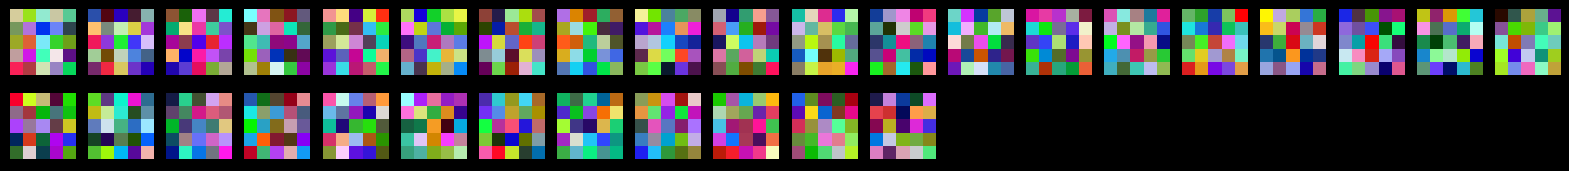

In [9]:
import torch
from model import DeepSoftHebb
torch.manual_seed(42)
import numpy as np
import matplotlib.pyplot as plt

# model = DeepSoftHebb(device='cpu', in_channels=3, dropout=0.0, input_size=28, neuron_centric=True, unsupervised_first=True)

# Load the model
model = torch.load('data/best_model.pth', map_location='cpu')
# Print the model weights 


# get the number of kernels in the first layer
num_kernels = model.conv1.weight.size(0)
print(num_kernels)

xaxes = num_kernels // 20 + 1
yaxes = 20
fig, axes = plt.subplots(xaxes, yaxes, figsize=(yaxes, xaxes))
# set black background  
fig.patch.set_facecolor('black')

count = 0
for i in range(xaxes):
    for j in range(yaxes):
        if xaxes == 1:
            axes[j].axis('off')
        else:
            axes[i, j].axis('off')

        if count >= num_kernels:
            continue
        img = model.conv1.weight[count].detach().cpu().numpy().transpose(1, 2, 0)
        img = (img - img.min()) / (img.max() - img.min())
        if xaxes == 1:
            axes[j].imshow(img)
        else:
            axes[i, j].imshow(img)
        count += 1

# print max and min
print(model.conv1.weight.max())
print(model.conv1.weight.min())

In [10]:
# print t_invert
print(model.conv1.t_invert)
print(model.conv2.t_invert)
print(model.conv3.t_invert)

tensor(1.)
tensor(1.)
tensor(1.)


128


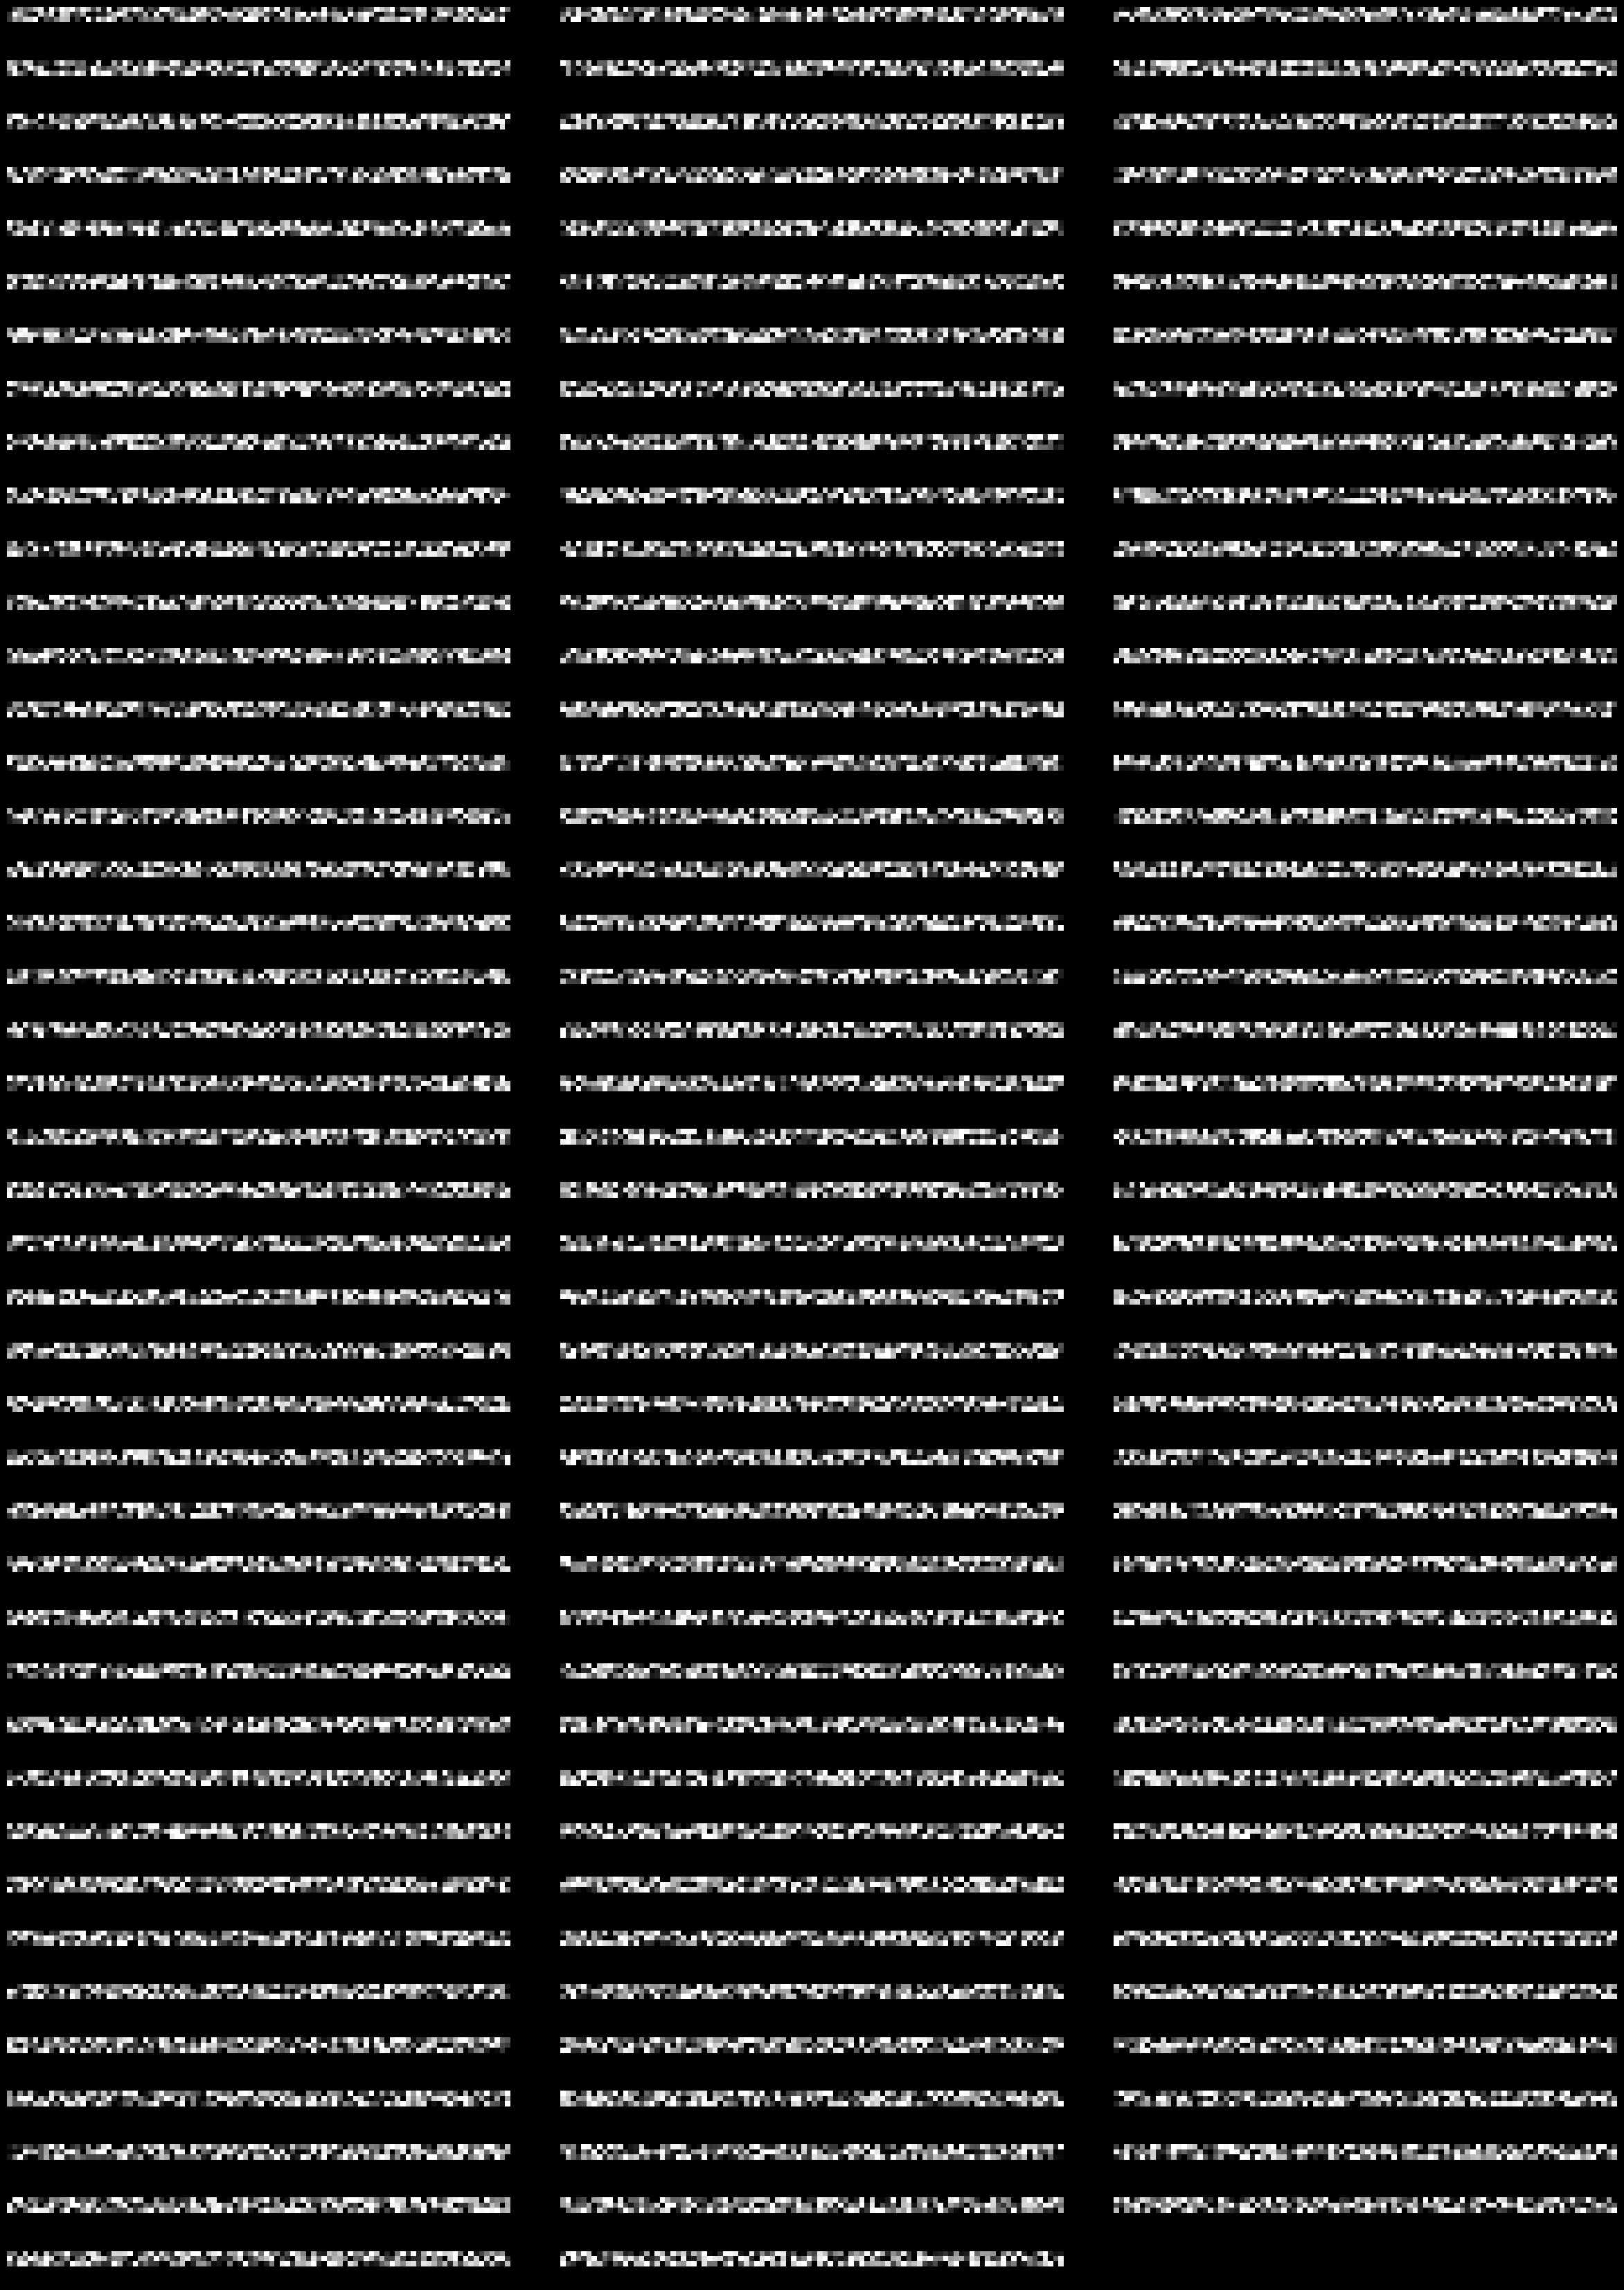

In [11]:
# print second layer kernel
num_kernels_2 = model.conv2.weight.size(0)
print(num_kernels_2)
num_channels = model.conv2.weight.size(1)

xaxes = num_kernels_2 // 3 + 1
yaxes = 3
fig, axes = plt.subplots(xaxes, yaxes, figsize=(yaxes * 10, xaxes))

# Set black background
fig.patch.set_facecolor('black')

count = 0
for i in range(xaxes):
    for j in range(yaxes):
        if xaxes == 1:
            axes[j].axis('off')
        else:
            axes[i, j].axis('off')

        if count >= num_kernels_2:
            continue
        
        # Create a grid of all channels for the current kernel
        grid = []
        for c in range(num_channels):
            img = model.conv2.weight[count, c].detach().cpu().numpy()
            img = (img - img.min()) / (img.max() - img.min())
            grid.append(img)
        
        grid = np.concatenate(grid, axis=1)
        
        if xaxes == 1:
            axes[j].imshow(grid, cmap='gray')
        else:
            axes[i, j].imshow(grid, cmap='gray')
        count += 1

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()


128


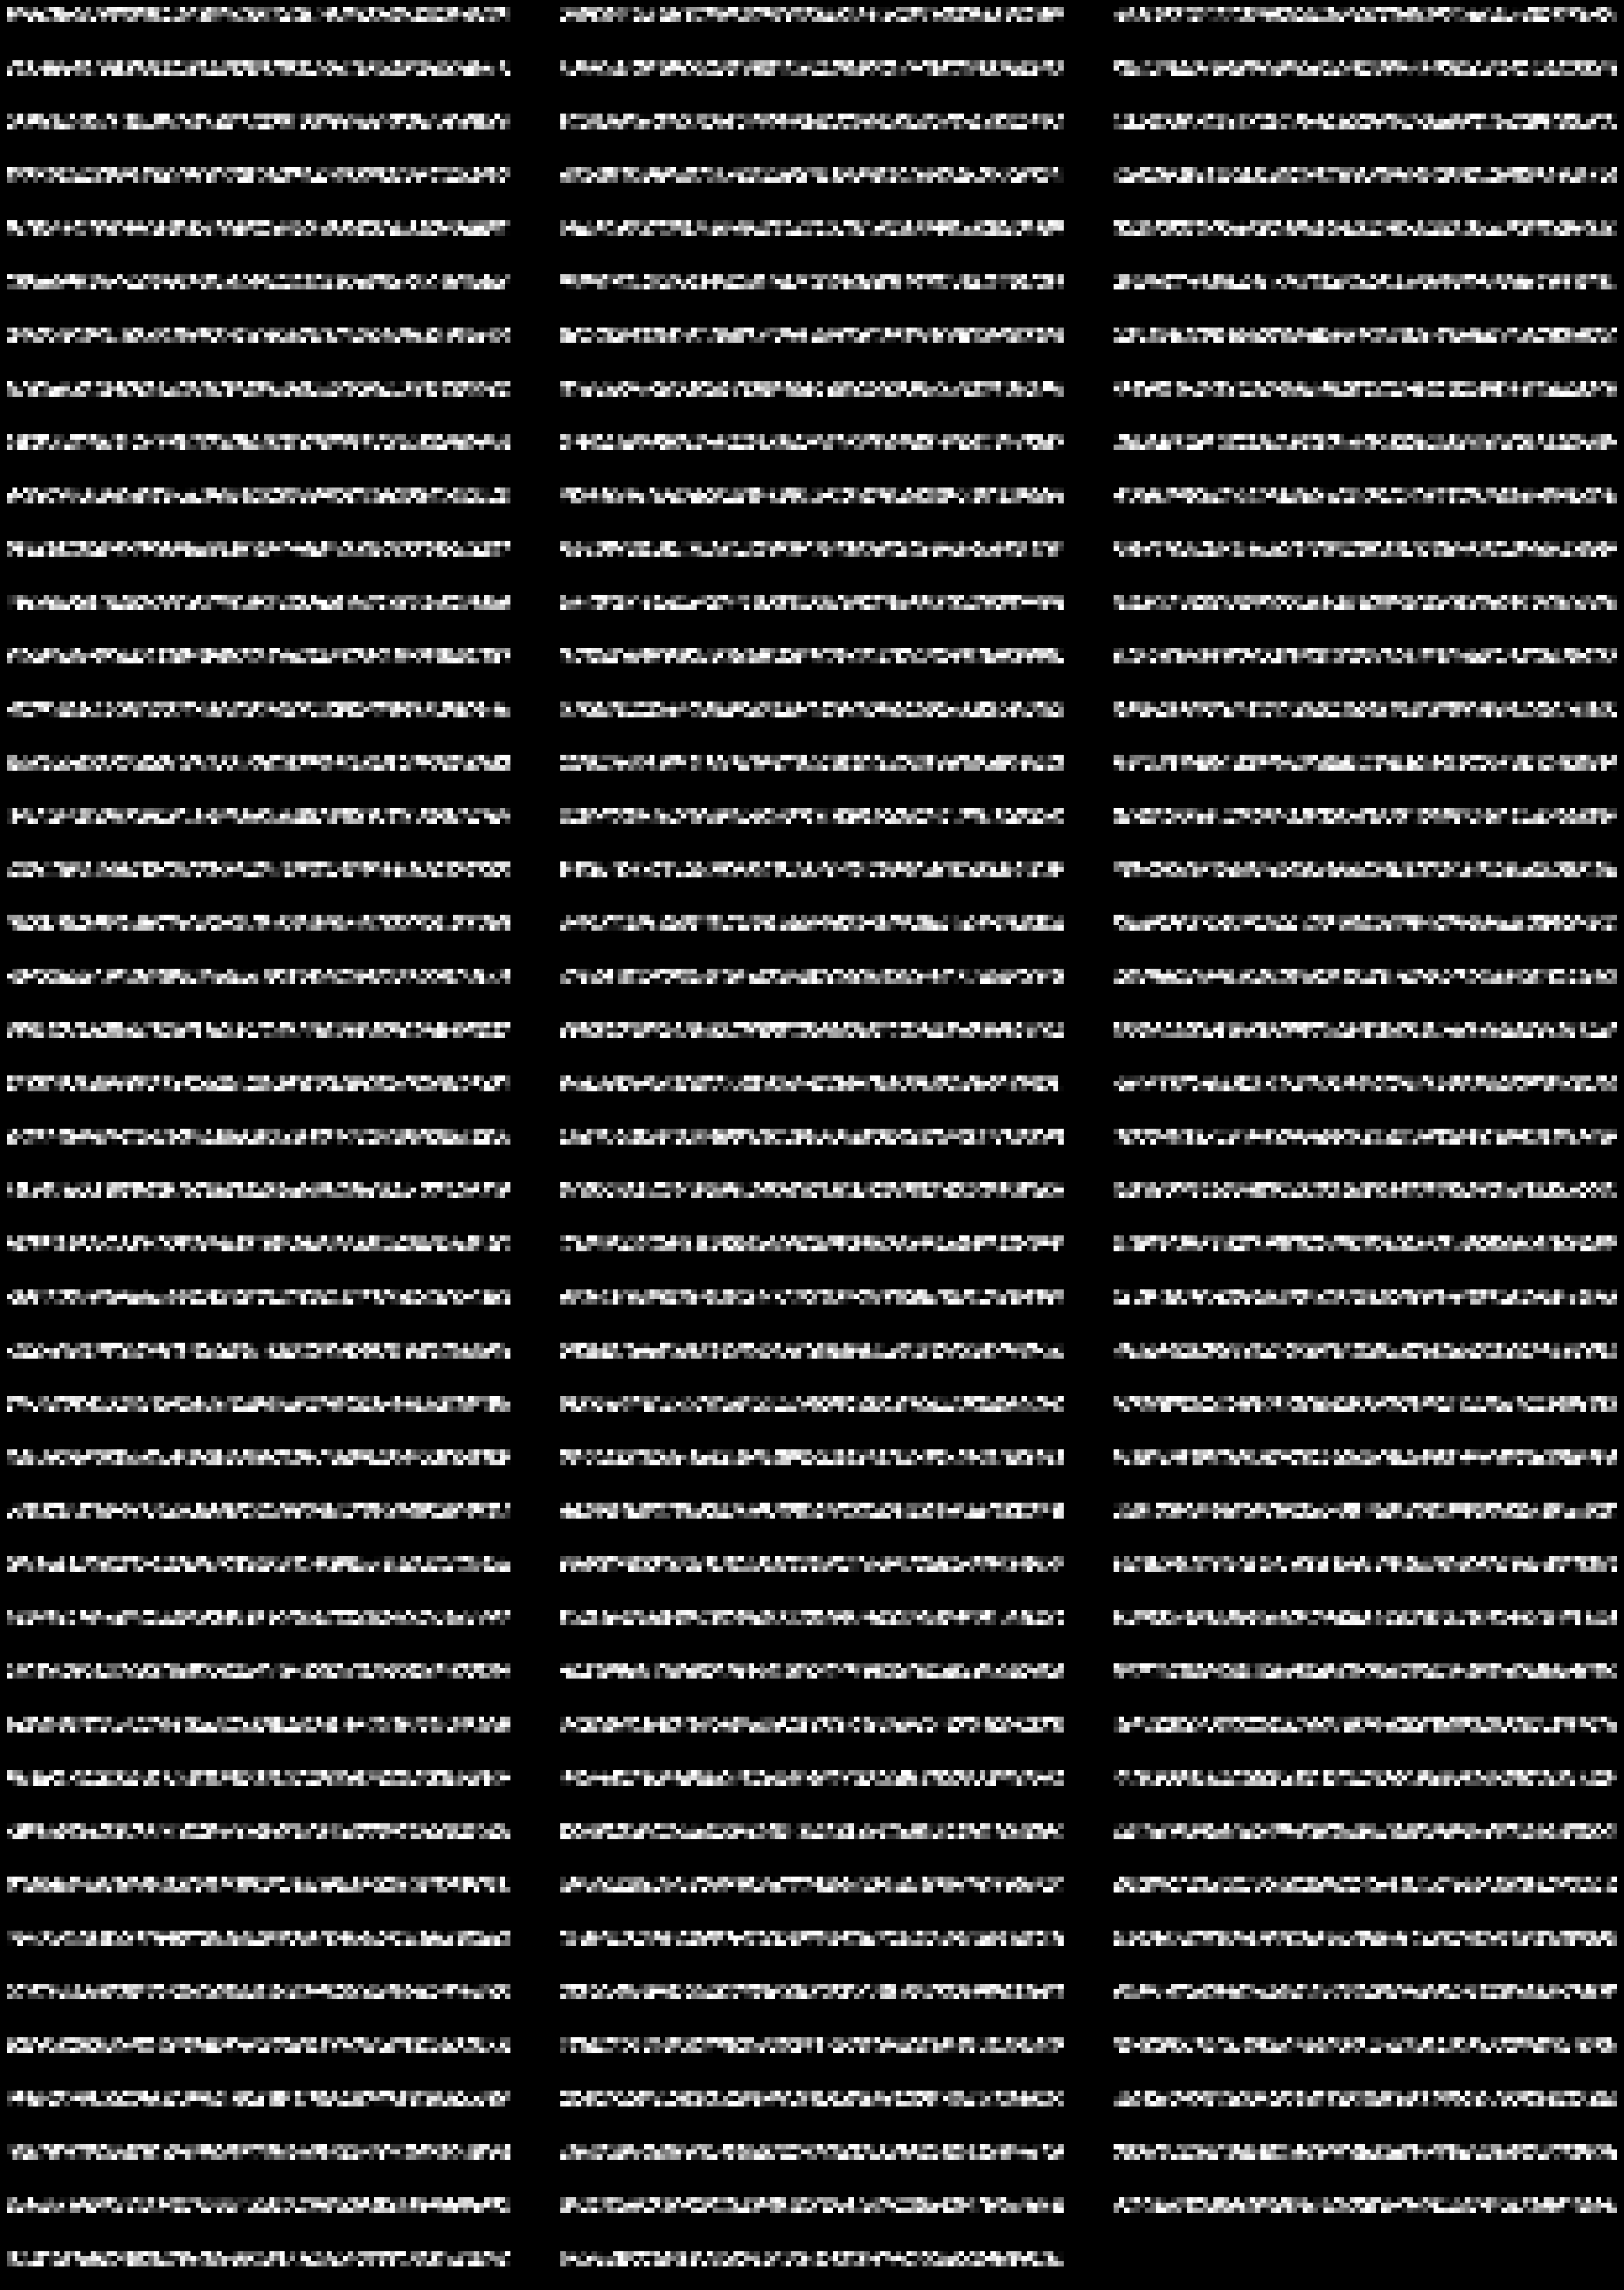

In [12]:
# print second layer kernel
num_kernels_3 = model.conv2.weight.size(0)
print(num_kernels_3)
num_channels = model.conv2.weight.size(1)

xaxes = num_kernels_3 // 3 + 1
yaxes = 3
fig, axes = plt.subplots(xaxes, yaxes, figsize=(yaxes * 10, xaxes))

# Set black background
fig.patch.set_facecolor('black')

count = 0
for i in range(xaxes):
    for j in range(yaxes):
        if xaxes == 1:
            axes[j].axis('off')
        else:
            axes[i, j].axis('off')

        if count >= num_kernels_2:
            continue
        
        # Create a grid of all channels for the current kernel
        grid = []
        for c in range(num_channels):
            img = model.conv3.weight[count, c].detach().cpu().numpy()
            img = (img - img.min()) / (img.max() - img.min())
            grid.append(img)
        
        grid = np.concatenate(grid, axis=1)
        
        if xaxes == 1:
            axes[j].imshow(grid, cmap='gray')
        else:
            axes[i, j].imshow(grid, cmap='gray')
        count += 1

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(5)


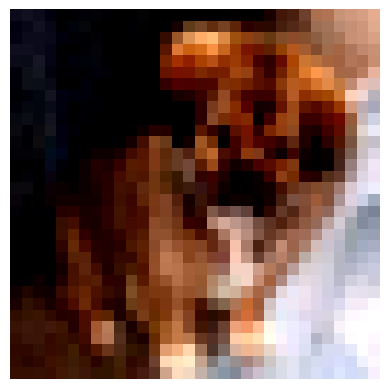

In [13]:
# get random image
from datasets import FastCIFAR10, FastMNIST

cifar = FastCIFAR10(root='./data', train=True, download=True)
mnist = FastMNIST(root='./data', train=False, download=True)
image, label = cifar[217]

print(label)

# plot the image
plt.figure()
plt.imshow(image.permute(1, 2, 0) + 0.5)
plt.axis('off')
plt.show()


AttributeError: 'DeepSoftHebb' object has no attribute 'bn1'

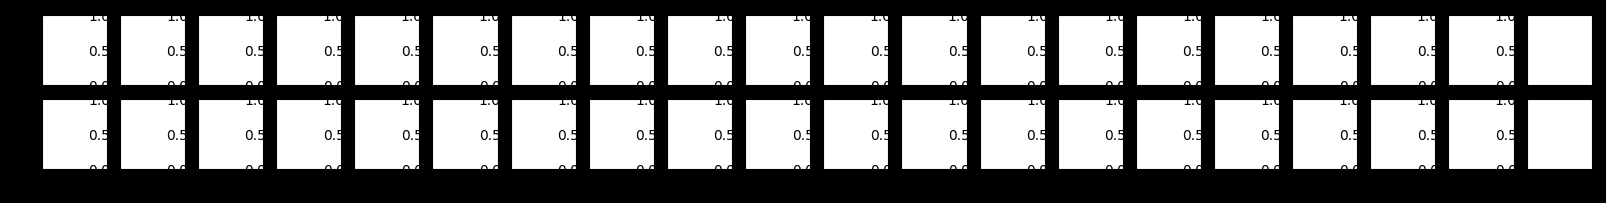

In [14]:
# show images generated from kernels
num_kernels = model.conv1.weight.size(0)
xaxes = num_kernels // 20 + 1
yaxes = 20
fig, axes = plt.subplots(xaxes, yaxes, figsize=(yaxes, xaxes))
# set black background
fig.patch.set_facecolor('black')

img_stack = []
image = model.bn1(image.unsqueeze(0)).squeeze(0) + 0.5

count = 0
for i in range(xaxes):
    for j in range(yaxes):
        if xaxes == 1:
            axes[j].axis('off')
        else:
            axes[i, j].axis('off')

        if count >= num_kernels:
            continue
        kernel = model.conv1.weight[count].detach().cpu()
        img = torch.nn.functional.conv2d(image.unsqueeze(0), kernel.unsqueeze(0)).squeeze(0).squeeze(0)
        img_stack.append(img)
        img = (img - img.min()) / (img.max() - img.min())
        if xaxes == 1:
            axes[j].imshow(img)
        else:
            axes[i, j].imshow(img)
        count += 1

plt.show()

img_stack = torch.stack(img_stack)
img_stack = model.pool1(img_stack)
img_stack = model.act(img_stack)
img_stack = model.bn2(img_stack.unsqueeze(0)).squeeze(0)

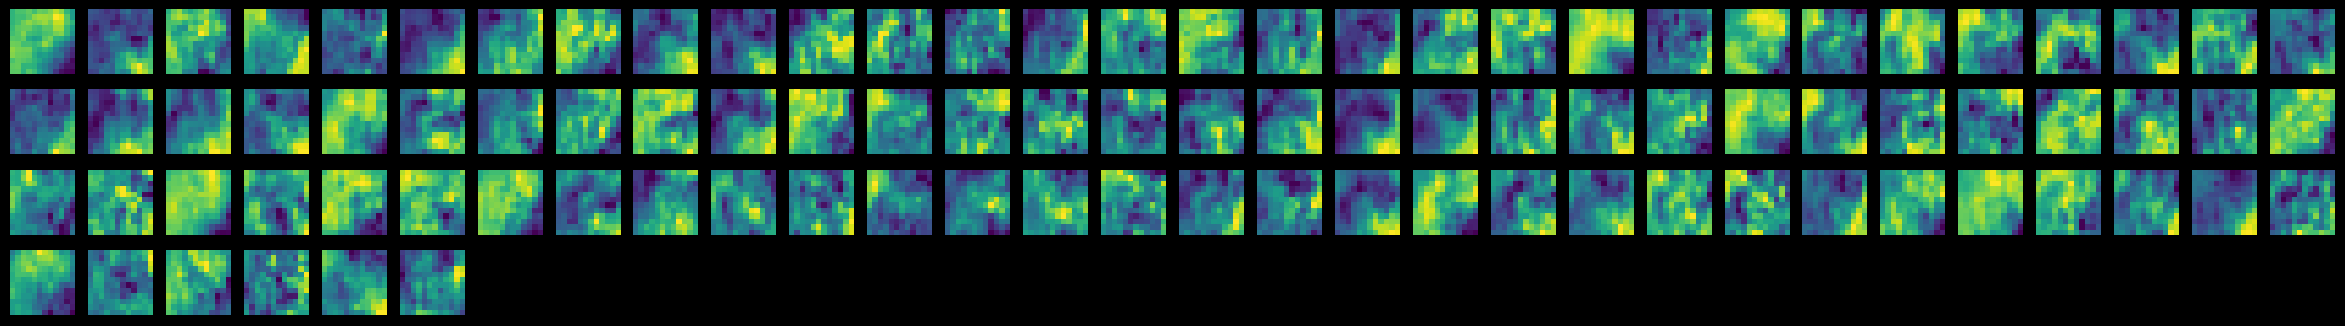

In [ ]:
# show images generated from second convolution
num_kernels = model.conv2.weight.size(0)
xaxes = num_kernels // 30 + 1
yaxes = 30

fig, axes = plt.subplots(xaxes, yaxes, figsize=(yaxes, xaxes))
# set black background
fig.patch.set_facecolor('black')

img_stack_2 = []

count = 0
for i in range(xaxes):
    for j in range(yaxes):
        if xaxes == 1:
            axes[j].axis('off')
        else:
            axes[i, j].axis('off')

        if count >= num_kernels:
            continue
        kernel = model.conv2.weight[count].detach().cpu()
        img = torch.nn.functional.conv2d(img_stack.unsqueeze(0), kernel.unsqueeze(0)).squeeze(0).squeeze(0)
        img_stack_2.append(img)
        img = (img - img.min()) / (img.max() - img.min())
        if xaxes == 1:
            axes[j].imshow(img)
        else:
            axes[i, j].imshow(img)
        count += 1

plt.show()

img_stack_2 = torch.stack(img_stack_2)
img_stack_2 = model.pool2(img_stack_2)
img_stack_2 = model.act(img_stack_2)
img_stack_2 = model.bn3(img_stack_2.unsqueeze(0)).squeeze(0)


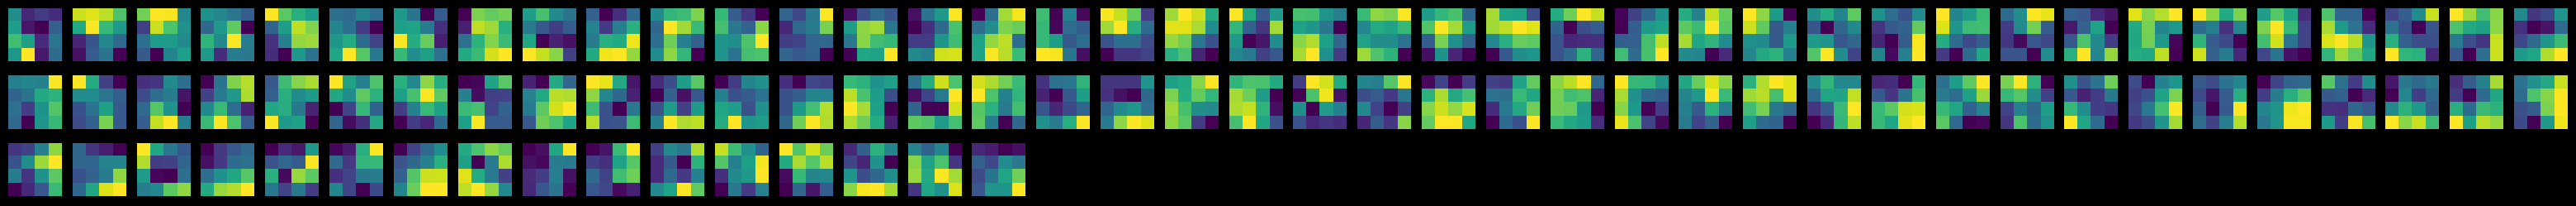

In [ ]:
# show images generated from third convolution
num_kernels = model.conv3.weight.size(0)
xaxes = num_kernels // 40 + 1
yaxes = 40

fig, axes = plt.subplots(xaxes, yaxes, figsize=(yaxes, xaxes))
# set black background
fig.patch.set_facecolor('black')

img_stack_3 = []

count = 0

for i in range(xaxes):
    for j in range(yaxes):
        if xaxes == 1:
            axes[j].axis('off')
        else:
            axes[i, j].axis('off')

        if count >= num_kernels:
            continue
        kernel = model.conv3.weight[count].detach().cpu()
        img = torch.nn.functional.conv2d(img_stack_2.unsqueeze(0), kernel.unsqueeze(0)).squeeze(0).squeeze(0)
        img_stack_3.append(img)
        img = (img - img.min()) / (img.max() - img.min())
        if xaxes == 1:
            axes[j].imshow(img)
        else:
            axes[i, j].imshow(img)
        count += 1

img_stack_3 = torch.stack(img_stack_3)
img_stack_3 = model.pool3(img_stack_3)
img_stack_3 = model.act(img_stack_3)


In [ ]:
# show flattened image
img_stack_3 = img_stack_3.view(-1)
img_stack_3 = (img_stack_3 - img_stack_3.min()) / (img_stack_3.max() - img_stack_3.min())

print(img_stack_3)

for i in range(0, len(img_stack_3), 28):
    print(img_stack_3[i:i+28])



tensor([0.1740, 0.1594, 0.2113, 0.1672, 0.2005, 0.1827, 0.1254, 0.1384, 0.1303,
        0.1242, 0.0830, 0.1065, 0.1837, 0.1739, 0.1826, 0.1935, 0.1039, 0.1104,
        0.0589, 0.1036, 0.1518, 0.1259, 0.2079, 0.1595, 0.1214, 0.0791, 0.1468,
        0.1123, 0.2387, 0.2834, 0.2573, 0.2973, 0.1619, 0.1425, 0.1793, 0.1370,
        0.1685, 0.1982, 0.2502, 0.2884, 0.2569, 0.2704, 0.2566, 0.2312, 0.1381,
        0.1063, 0.1316, 0.1826, 0.1083, 0.1719, 0.1078, 0.1070, 0.1680, 0.1716,
        0.1707, 0.1912, 0.1520, 0.2706, 0.1921, 0.2986, 0.2822, 0.3538, 0.3401,
        0.3345, 0.2021, 0.1971, 0.2378, 0.1963, 0.1636, 0.0864, 0.0403, 0.0475,
        0.2155, 0.1856, 0.1882, 0.1117, 0.1968, 0.1806, 0.1716, 0.1629, 0.2020,
        0.1657, 0.2347, 0.1729, 0.3043, 0.3254, 0.3074, 0.2554, 0.2504, 0.2288,
        0.1925, 0.1602, 0.1332, 0.1162, 0.0650, 0.1083, 0.2256, 0.2404, 0.2106,
        0.2159, 0.1084, 0.1605, 0.1491, 0.2082, 0.1424, 0.1642, 0.1406, 0.1138,
        0.2855, 0.2198, 0.2427, 0.2389, 

In [ ]:
import torch.nn.functional as F

class ConvolutionalLayerWithCredit:
    def __init__(self, weight, stride, dilation, groups, F_padding):
        self.weight = weight
        self.stride = stride
        self.dilation = dilation
        self.groups = groups
        self.F_padding = F_padding
        self.credit = None
        self.out = None

    def balanced_credit_fn(self, output):
        # Define your balanced_credit_fn here
        # Example: Assuming balance is simply output for demonstration
        return output
    
    def update_credit(self):
        with torch.no_grad():
            # Compute the balance
            balance = self.balanced_credit_fn(self.out)  # [batch, out_channels, height, width]

            # Perform transposed convolution to propagate credit back
            updated_credit = F.conv_transpose2d(
                balance,                     # Use balance directly for credit propagation
                self.weight.flip((2, 3)),    # Flip the kernel for convolution
                stride=self.stride,
                padding=0,
                dilation=self.dilation,
                groups=self.groups,
                output_padding=self.F_padding[0]
            ) / self.out.shape[1]

            # Sum the batch dimension to aggregate the credit updates
            updated_credit = updated_credit.sum(dim=0)  # [in_channels, height_out, width_out]

            # Update the credit by summing over spatial dimensions
            print(updated_credit.shape)
            print(self.credit.shape)
            self.credit = self.credit[None, :] * updated_credit.view(-1)

# Example instantiation and usage
weight = torch.randn(3, 3, 5, 5)  # Example weight tensor
layer = ConvolutionalLayerWithCredit(weight, stride=1, dilation=1, groups=1, F_padding=(0, 0))

# Assume self.out and self.credit are set before calling update_credit
layer.out = torch.randn(10, 3, 32, 32)  # Example output from forward pass
layer.credit = torch.randn(3, 32, 32)  # Initial credit

layer.update_credit()
print(layer.credit)

torch.Size([3, 36, 36])
torch.Size([3, 32, 32])


RuntimeError: The size of tensor a (32) must match the size of tensor b (3888) at non-singleton dimension 3

In [ ]:
input = torch.rand(1, 1, 6, 6)
print(input)
print(input.size())

kernel = torch.tensor([[1., 2.], [3., 4.]]).unsqueeze(0).unsqueeze(0)

stride=1
conv = torch.nn.functional.conv2d(input, kernel, stride=stride, padding=0)
print(conv)
print(conv.size())

transposed_conv = torch.nn.functional.conv_transpose2d(conv, kernel.flip([2,3]), stride=stride, padding=0)
print(transposed_conv)
print(transposed_conv.size())

tensor([[[[0.3370, 0.6689, 0.8188, 0.7308, 0.0580, 0.1993],
          [0.4211, 0.9837, 0.5723, 0.3705, 0.7069, 0.3096],
          [0.1764, 0.8649, 0.2726, 0.3998, 0.0026, 0.8346],
          [0.8788, 0.6822, 0.1514, 0.0065, 0.0939, 0.8729],
          [0.7401, 0.9208, 0.7619, 0.6265, 0.4951, 0.1197],
          [0.0716, 0.0323, 0.7047, 0.2545, 0.3994, 0.2122]]]])
torch.Size([1, 1, 6, 6])
tensor([[[[6.8727, 7.5468, 5.4796, 4.7859, 3.8155],
          [6.3773, 5.8138, 3.7304, 2.9939, 4.6723],
          [7.2716, 4.0624, 1.5524, 0.8002, 5.4450],
          [8.1464, 6.7949, 4.9564, 4.0544, 3.8039],
          [2.9257, 5.3603, 5.1471, 3.9778, 2.7817]]]])
torch.Size([1, 1, 5, 5])
tensor([[[[27.4908, 50.8053, 44.5587, 35.5822, 29.6195, 11.4464],
          [39.2547, 64.3534, 50.8687, 38.2181, 40.0878, 17.8324],
          [41.8411, 56.0691, 31.6712, 17.5762, 36.5191, 21.0073],
          [47.1289, 67.0154, 47.3776, 34.2396, 39.0690, 16.8567],
          [27.9957, 51.9547, 53.3773, 44.4178, 34.7224, 12.1

In [ ]:
import torch

input = torch.rand(4, 8)
inp_norm = torch.norm(input, dim=1)
print('input_norm: ', inp_norm)
print('input: ', input)

weight = torch.rand(3, 8)
weight_norm = torch.norm(weight, dim=1)
print('weight_norm: ', weight_norm)
print('weight: ', weight)

output = torch.matmul(input, weight.t())
print('output: ', output)

# cosine similarity
output = torch.nn.functional.cosine_similarity(input.unsqueeze(1), weight.unsqueeze(0), dim=2)
print('output: ', output * inp_norm.unsqueeze(1) * weight_norm.unsqueeze(0))


input_norm:  tensor([1.2331, 1.4362, 1.5158, 1.8126])
input:  tensor([[0.8559, 0.4893, 0.5558, 0.1551, 0.1529, 0.2003, 0.0636, 0.3846],
        [0.5471, 0.7808, 0.0673, 0.2987, 0.6890, 0.6668, 0.3277, 0.1824],
        [0.8570, 0.1586, 0.4400, 0.9579, 0.1341, 0.0132, 0.4741, 0.4290],
        [0.9106, 0.6116, 0.3026, 0.8888, 0.9178, 0.1121, 0.3572, 0.4672]])
weight_norm:  tensor([1.5867, 1.6564, 1.2860])
weight:  tensor([[0.0049, 0.6895, 0.4112, 0.4195, 0.6680, 0.6849, 0.1015, 0.8784],
        [0.9152, 0.6326, 0.5417, 0.1573, 0.2188, 0.1314, 0.8983, 0.5618],
        [0.3339, 0.0782, 0.7249, 0.2790, 0.1076, 0.7608, 0.4081, 0.4196]])
output:  tensor([[1.2189, 1.7513, 1.1264],
        [1.8045, 1.7133, 1.1675],
        [1.2199, 1.9716, 1.2827],
        [2.0600, 2.3228, 1.3451]])
output:  tensor([[1.2189, 1.7513, 1.1264],
        [1.8045, 1.7133, 1.1675],
        [1.2199, 1.9716, 1.2827],
        [2.0600, 2.3228, 1.3451]])
